In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("Mall_Customers.csv")

df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

df.dropna(inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

best_score = -1
best_k = None
scores = {}

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    scores[k] = score
    
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nBest K: {best_k} with Silhouette Score: {best_score:.4f}")

Silhouette Score for 2 clusters: 0.3355
Silhouette Score for 3 clusters: 0.3578
Silhouette Score for 4 clusters: 0.4040
Silhouette Score for 5 clusters: 0.4166

Best K: 5 with Silhouette Score: 0.4166


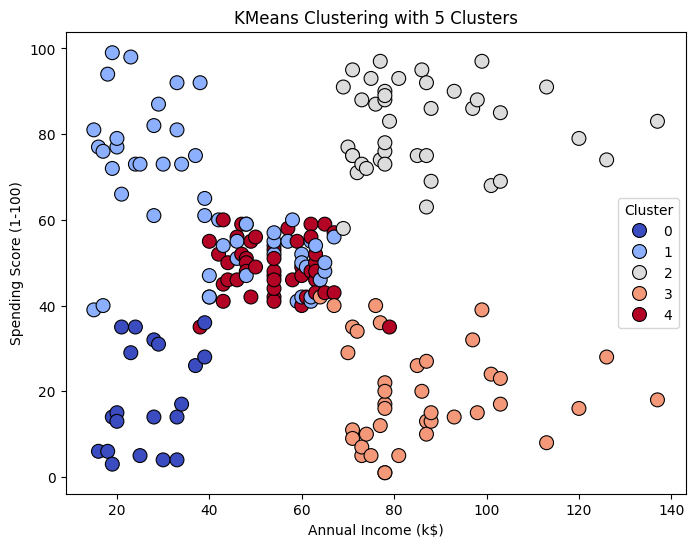

In [7]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['Cluster'], palette='coolwarm', s=100, edgecolors='k')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(f"KMeans Clustering with {best_k} Clusters")
plt.legend(title="Cluster")
plt.show()